## Observations and Insights 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [39]:
# Checking the number of mice.
unique_mice = combined_df['Mouse ID'].nunique()
unique_mice


249

In [51]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [64]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.drop(combined_df.loc[combined_df['Mouse ID']=='g989'].index, inplace=False)
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [66]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].nunique()

248

## Summary Statistics

In [86]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_statistics_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'Standard Deviation': standard_deviation,
    'SEM': SEM
})
summary_statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [102]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggrigated_df = cleaned_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})
aggrigated_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

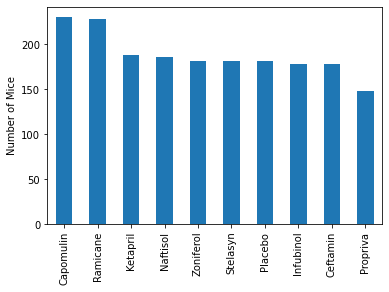

In [131]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
cleaned_df['Drug Regimen'].value_counts().plot(kind='bar')
plt.ylabel('Number of Mice')

<BarContainer object of 10 artists>

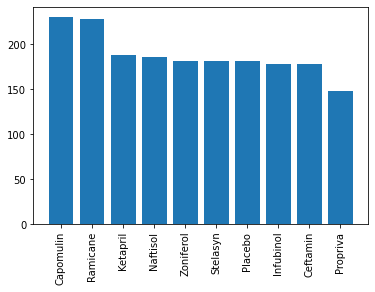

In [170]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.xticks(rotation=90)
plt.bar(cleaned_df['Drug Regimen'].value_counts().index, cleaned_df['Drug Regimen'].value_counts())


([<matplotlib.patches.Wedge at 0x7fa122ad6610>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

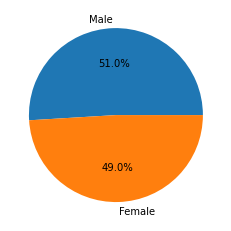

In [177]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = ['Male', 'Female']
plt.pie(cleaned_df['Sex'].value_counts(), labels=labels, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7fa1422954f0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

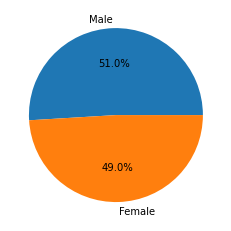

In [178]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
plt.pie(cleaned_df['Sex'].value_counts(), labels=labels, autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [301]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
total_volume = cleaned_df.groupby(["Mouse ID"])['Timepoint'].max().reset_index()


total_volume

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = total_volume.merge(cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_df.loc[merged_df['Drug Regimen'].isin(['Capomulin','Ramicane', 'Infubinol', 'Ceftamin'])]

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [329]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    print(f"{drug} Total Tumor Volume: {merged_df.loc[merged_df['Drug Regimen'] == drug]['Tumor Volume (mm3)'].sum()}")
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
merged_df['Tumor Volume (mm3)'].max()
merged_df['Tumor Volume (mm3)'].min()

Capomulin Total Tumor Volume: 916.68919298
Ramicane Total Tumor Volume: 904.78476071
Infubinol Total Tumor Volume: 1454.45614463
Ceftamin Total Tumor Volume: 1443.8494206300002


22.05012627

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa0f0237730>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa15486cb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa15489e6a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa122c69a60>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa122c69700>,
 'means': []}

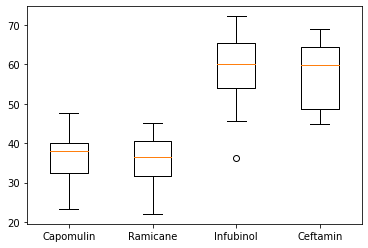

In [385]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_list = []
for drug in drug_list:
    box_list.append(merged_df.loc[merged_df['Drug Regimen'] == drug]['Tumor Volume (mm3)'])

plt.boxplot(box_list, labels=drug_list)


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

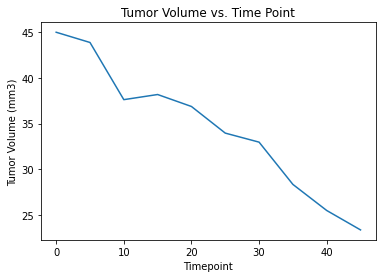

In [445]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

plt.plot(cleaned_df.loc[cleaned_df['Drug Regimen'] == "Capomulin"].loc[cleaned_df['Mouse ID']== 's185']['Timepoint'], cleaned_df.loc[cleaned_df['Drug Regimen'] == "Capomulin"].loc[cleaned_df['Mouse ID']== 's185']['Tumor Volume (mm3)'])
plt.title('Tumor Volume vs. Time Point')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Tumor Volume (mm3)')

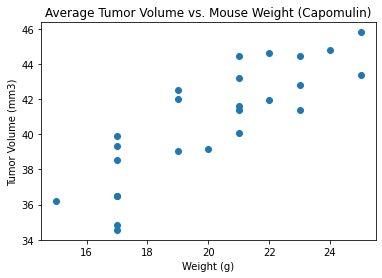

In [452]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_data = cleaned_df.loc[cleaned_df['Drug Regimen'] == "Capomulin"].groupby(['Mouse ID']).mean()
plt.scatter(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)'])
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin)")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

## Correlation and Regression

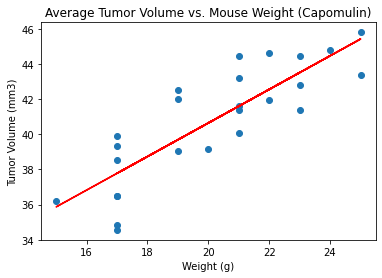

In [467]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
import numpy as np
scatter_data = cleaned_df.loc[cleaned_df['Drug Regimen'] == "Capomulin"].groupby(['Mouse ID']).mean()
x = scatter_data['Weight (g)']
y = scatter_data['Tumor Volume (mm3)']
plt.scatter(x, y)
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin)")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
m, b = np.polyfit(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)'], 1)
plt.plot(x, m*x + b, color='red')
